# **London Underground Visualisation**

## Objectives

* Conducting analysis and creating visualisations using the ug_clean dataset

## Inputs

* The ug_clean.csv file we created previously will be the basis for analysis and visualisation

## Outputs

* By the end of the notebook we should have 3 visualisations each from Matplotlib, Seaborn and Plotly


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Project-1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Project-1'

Importing necessary libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


# Matplotlib

In this section we'll be trying to answer 3 important questions:
* What happens to station usage over time?
* What Zones have the highest usage over the past year?
* What stations are used the most?

First lets remind ourselves of the DataFrame

In [34]:
underground_df = pd.read_csv(r'Dataset\Cleaned\ug_clean.csv')
underground_df.head()

,Station,TravelDate,DayOfWeek,EntryTapCount,ExitTapCount,LINES,NETWORK,Zone,x,y
0,Acton Town,2024-01-01,Monday,2928,3334,"District, Piccadilly",London Underground,3,-0.278433,51.502137
1,Aldgate,2024-01-01,Monday,7223,7382,"Metropolitan, Circle",London Underground,1,-0.074236,51.513982
2,Aldgate East,2024-01-01,Monday,10657,11723,"Hammersmith & City, District",London Underground,1,-0.069540,51.514917
3,Alperton,2024-01-01,Monday,2117,2235,Piccadilly,London Underground,4,-0.298361,51.540227
4,Amersham,2024-01-01,Monday,793,815,Metropolitan,London Underground,9,-0.606147,51.673662


Then we can manipulate the data and use it for our line plot

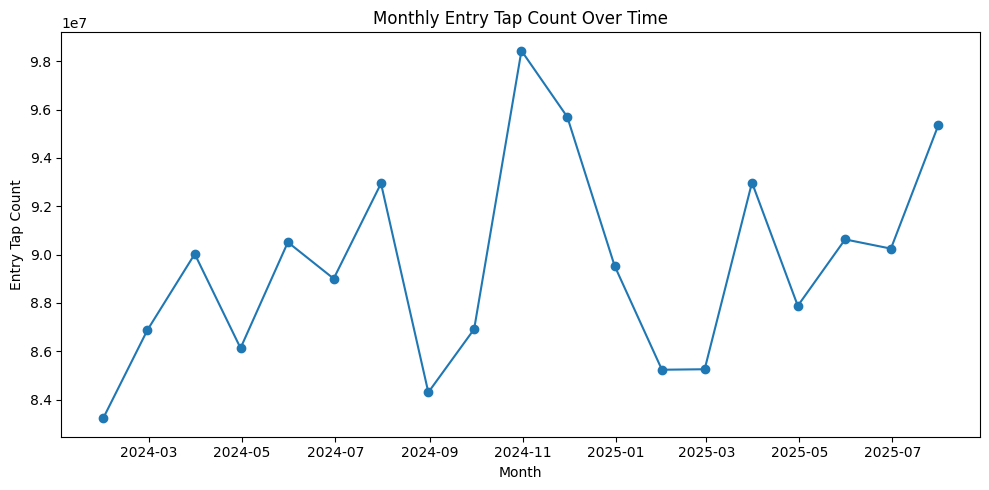

In [38]:
# Grouping the data by month and summing the EntryTapCount
underground_df['TravelDate'] = pd.to_datetime(underground_df['TravelDate'])
monthly = underground_df.groupby(pd.Grouper(key='TravelDate', freq='M'))['EntryTapCount'].sum()

# Removing the last month if it is incomplete
monthly = monthly.iloc[:-1]

# Plotting the monthly entry tap count
plt.figure(figsize=(10, 5))
plt.plot(monthly.index, monthly.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Entry Tap Count')
plt.title('Monthly Entry Tap Count Over Time')
plt.tight_layout()
plt.show()

The line plot above conveys some useful insights:
* To answer our first question it seems like station usage over time is going up, this could be a result of population increase and the increasing number of jobs being created in the London area increasing the number of commuters overall.

* There's a noticable peak around the months of November and early December with a sharp drop towards the end of December, this can be explained by the Christmas shopping season creating a sudden rise in demand of the Underground and then the Christmas holiday period causing the sharp drop due to the sudden absence of commuters.

Now lets have a look at usage by Zones

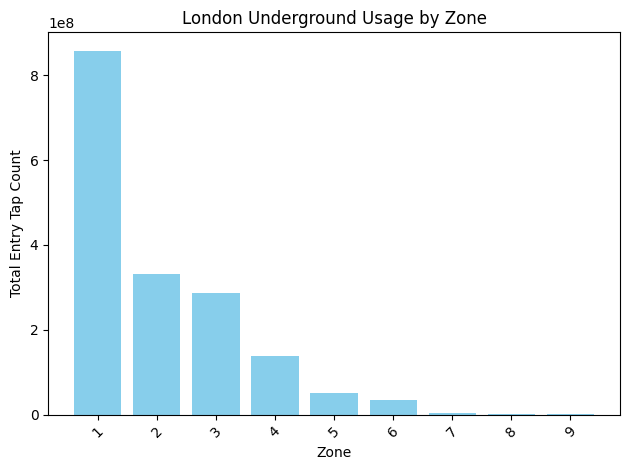

In [ ]:
# Grouping the data by Zone and summing the EntryTapCount
underground_df['Zone'] = underground_df['Zone'].astype(str)  # Ensure Zone is treated as a string
zones_usage = underground_df.groupby('Zone')['EntryTapCount'].sum().reset_index()

plt.bar(zones_usage['Zone'], zones_usage['EntryTapCount'], color='skyblue')
plt.xlabel('Zone')
set_ticks = zones_usage['Zone'].unique()
plt.xticks(set_ticks, rotation=45)
plt.ylabel('Total Entry Tap Count')
plt.title('London Underground Usage by Zone')
plt.tight_layout()
plt.show()


The bar plot shows that the inner zones account for the vast majority of Underground usage, with Zone 1 having the highest usage by a large margin. It would seems that the further from Zone 1 you get the lower the usage is.

Finally we'll lookm at 

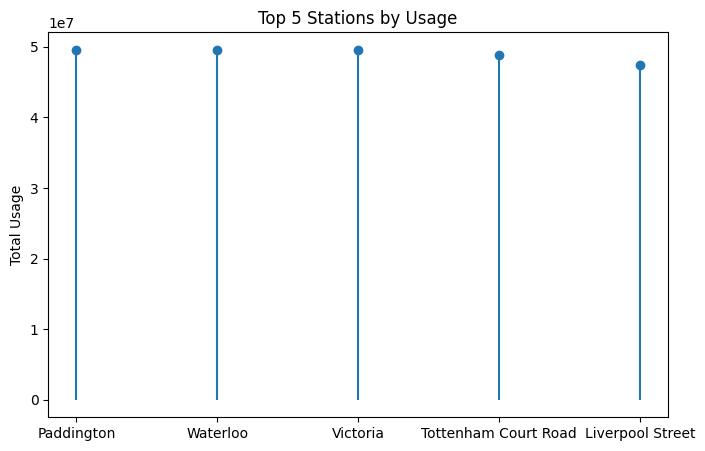

In [ ]:
# Aggregate usage per station
station_usage = underground_df.groupby('Station')['EntryTapCount'].sum()

# Sort and select top 5
top5_df = (
    underground_df.groupby(['Station', 'Zone'])['EntryTapCount']
    .sum()
    .reset_index()
    .sort_values('EntryTapCount', ascending=False)
    .head(5)
)

# Plot lolipop chart
plt.figure(figsize=(8,5))
plt.stem(top5.index, top5.values, basefmt=" ")
plt.ylabel("Total Usage")
plt.title("Top 5 Stations by Usage")
plt.show()

In [48]:
top5_df

,Station,Zone,EntryTapCount
163,Paddington,1,49596508
230,Waterloo,1,49552730
225,Victoria,1,49498096
212,Tottenham Court Road,1,48826455
130,Liverpool Street,1,47407857


At a first glance the lolipop chart doesn't provide a great deal of insight, yes we know what the top 5 stations are for usage but there's very litle margin between them. The same is found even when comparing the top 20 stations. However this does tell us that the main difference in usage is not between stations but between zones which is useful to know.

---

# Seaborn

In this Section we'll be expanding on our findings from the Matplotlib section by analysing more complex graphs created with Seaborn

Lets take a look at station usage per month

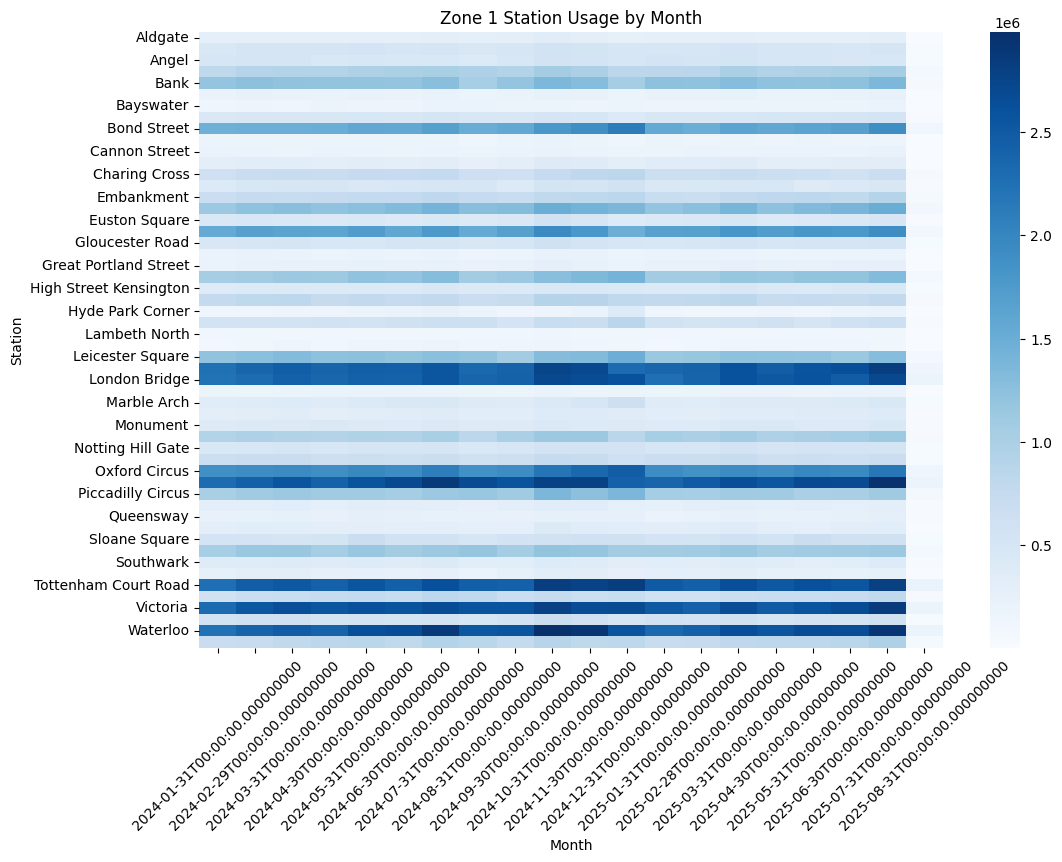

In [51]:
# Filter for Zone 1 stations
zone1_df = underground_df[underground_df['Zone'] == '1']

# Group by station & month
monthly_usage = (
    zone1_df.groupby(['Station', pd.Grouper(key='TravelDate', freq='M')])['EntryTapCount']
    .sum()
    .reset_index()
)

# Pivot table for heatmap
pivot_df = monthly_usage.pivot(index='Station', columns='TravelDate', values='EntryTapCount')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='Blues')
plt.title('Zone 1 Station Usage by Month')
plt.xlabel('Month')
plt.ylabel('Station')
plt.xticks(rotation=45)
plt.show()

In this heatmap we can see the same pattern outlined in the matplotlib line plot with usage increasing just before the Christmas period, however an additional insight gained from this Heatmap is that certain stations (Bond Street, Oxford Circus, London Bridge) stand out in usage during this period. This can be explained by businesses and shops near to these stations; Oxford Circus is surrounded by many shopping centres and clothes shops, the London Bridge area is known for its food markets and Bond Street is home to many luxury and high end retailers.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
